IMPORTAR BIBLIOTECAS

In [35]:
import pandas as pd

In [36]:
import matplotlib.pyplot as plt

LER ARQUVIO CSV

In [37]:
df = pd.read_csv('ProuniRelatorioDadosAbertos2020.csv', sep=';', encoding='latin-1')


CRIANDO UM GRÁFICO

In [38]:
regiao = df['REGIAO_BENEFICIARIO'].value_counts()

In [39]:
cor = df['RACA_BENEFICIARIO'].value_counts()

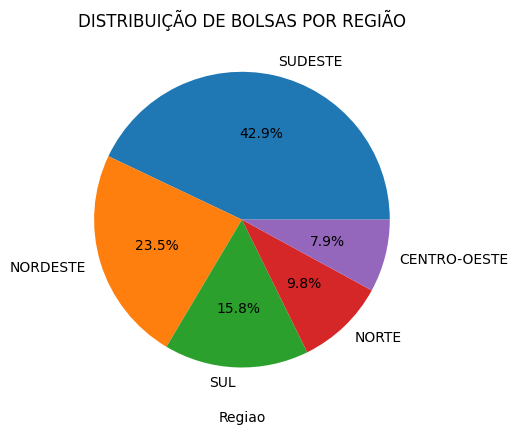

In [40]:
regiao.plot(kind='pie', autopct='%1.1f%%')
plt.xlabel("Regiao")
plt.ylabel("")
plt.title('DISTRIBUIÇÃO DE BOLSAS POR REGIÃO')
plt.show()

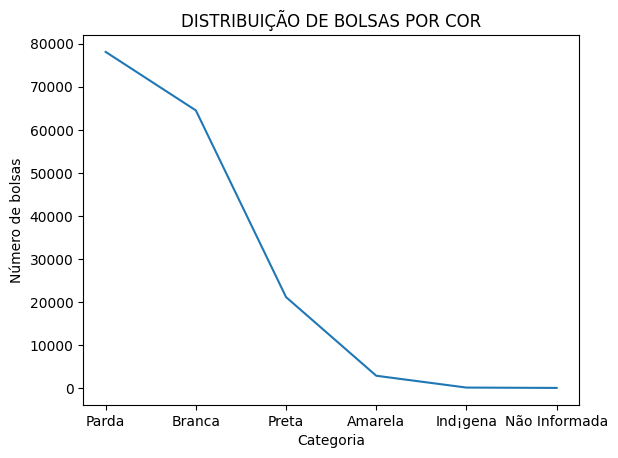

In [41]:
cor.plot()
plt.xlabel('Categoria')
plt.ylabel('Número de bolsas')
plt.title('DISTRIBUIÇÃO DE BOLSAS POR COR')
plt.show()

GERANDO PDF COM FPDF

In [42]:
from fpdf import FPDF

In [43]:
pdf = FPDF(orientation='p', unit='mm', format='A4')

In [44]:
pdf.add_page()


In [45]:
pdf.set_font("Helvetica", size=16, style='B')

In [46]:
pdf.cell(w=0, h=10,text="DISTRIBUIÇÃO DE BOLSAS POR COR E REGIÃO", align='c')

False

In [47]:
pdf.ln(10)

In [48]:
pdf.set_font(size=14)

In [49]:
pdf.cell(0, 15, "SOBRE O PROUNI", align='c')


False

In [50]:
pdf.ln(15)

In [51]:
pdf.set_font(size=12)
pdf.multi_cell(w=0,h=5, text="Sabe-se que o PROUNI é um programa do Ministério da Educação que visa disponibilizar bolsas de estudo integrais e parciais em instituições particulares de ensino superior, promovendo a capacitação e desenvolvimento da população brasileira, entretanto com base na análise dos dados do PROUNI 2020, obtidos no site do MEC, é possível perceber alta disparidade na presença de povos indígenas comparados a outras cores ou raças.", align='j')

False

In [52]:
pdf.ln(10)

In [53]:
pdf.cell(w=0,h=5, text="O gráfico abaixo demonstra tamanha diferença, pode-se dizer que sua participação é próxima a zero.")

False

In [54]:

cor.plot()
plt.title('Bolsas por cor ou raça')
plt.ylabel("")
plt.xlabel("")
plt.savefig('graphic_cor.png')
plt.close()

In [55]:
pdf.image('graphic_cor.png', x=25, y=80, w=150)

{'data': b'x\x9c\xec\xdd\x07XSg\xdb\x07\xf0\xaa\x15\x8a\xb6\x8a\xbe\xa2U\xeb\x16m+u\xd4m\xb5K\x8b\xf3\xd5\xeaW\xb5v\xd8j\x8b\xfa\xaa\xd5\xd6UP\x91\xbapk[\xdc\x93Z\x07\x8e:Z6\x02\x0e\xa6 {(\x022d\t\x08\x82\xec$|\xb7\x9cz\x9a\x06\x0cC\xe0\xc9y\xf2\xff]\\^\'\xe7$\'w\xceI\xee\x7f\x9exN\xf2B)\x00\x00\x00\xd4\xbb\x17X\x17\x00\x00\x00\xa0\x8d\x10\xc0\x00\x00\x00\x0c \x80\x01\x00\x00\x18@\x00\x03\x00\x000\x80\x00\x06\x00\x00`\x00\x01\x0c\x00\x00\xc0\x00\x02\x18\x00\x00\x80\x01\x040\x00\x00\x00\x03\x08`\x00\x00\x00\x06\x10\xc0\x00\x00\x00\x0c \x80\x01\x00\x00\x18@\x00\x03\x00\x000\x80\x00\x06\x00\x00`\x00\x01\x0c\x00\x00\xc0\x00\x02\x18\x00\x00\x80\x01\x040\x00\x00\x00\x03\x08`\x00\x00\x00\x06\x10\xc0\x00\x00\x00\x0c \x80\x01\x00\x00\x18@\x00\x03\x00\x000\x80\x00\x06\x00\x00`\x00\x01\x0c\x00\x00\xc0\x00\x02\x18\x00\x00\x80\x01\x040\x00\x00\x00\x03\x08`\x00\x00\x00\x06\x10\xc0\x00\x00\x00\x0c \x80\x01\x00\x00\x18@\x00\x03\x00\x000\x80\x00\x06\x00\x00`\x00\x01\x0c\x00\x00\xc0\x00\x02\x18\x00\x00\

In [56]:
regiao.plot(kind='pie', autopct='%1.1f%%')
plt.title('Bolsas por região')
plt.ylabel("")
plt.savefig('graphic_regiao.png')
plt.close()

In [57]:
pdf.add_page()

In [58]:
pdf.cell(w=0, h=10,text="DISTRIBUIÇÃO DE BOLSAS POR REGIÃO", align='c')

False

In [59]:
pdf.ln(15)

In [60]:
pdf.multi_cell(w=0, h=5, text="Dados do Censo de 2022 revelam que o Brasil tem 1,7 milhão de indígenas, 44,48% da população está localizada no norte do país (Os dados obtidos no arquivo são de 2020, porém não houve Censo em 2020 devido às consequências da pandemia, e em 2021 devido ao corte de gastos)",align='j')

False

In [61]:
pdf.ln(10)

In [62]:
pdf.cell(w=0,h=5, text="Como ilustrado no gráfico, o número de bolsas na região norte era de apenas 9,8%")

False

In [63]:
pdf.image('graphic_regiao.png', x=25, y=60, w=150)

{'data': b'x\x9c\xed\xdd\x05XTi\x1b\x06`\xbaS@\x04\xc5@\xc1VT\xecU\xd7.\xd4\xb5\xb0c]\xbb{\xad\x15\xc1\x0el,P\\\x03[\xecn1\xd7\xc2\x00[\xec\xc6\xa2k\xfeW\x8f;\xff\xec\xd003\xef\xc4s\xefs\xed5s\xe6\xcca\xc0\xf9\xce3\xdfp\xe6\xa0%\x02\x00\x00\x00\x85\xd3\xe2~\x00\x00\x00\x00\x9a\x08\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x0

In [64]:
pdf.ln(130)

In [65]:
pdf.multi_cell(w=0,h=5, text="Ao analisar que a região que contém a maioria da população indígena é uma das que menos possui bolsas e o PROUNI é um meio facilitador para sua inserção, insere-se que não há expressão destes povos nas faculdades.")

False

In [66]:
pdf.ln(10)

In [67]:
pdf.cell(w=0,h=5,text="Dessa forma são necessários estudos que proporcionam a inclusão dos povos nativos no ensino superior.")

False

In [68]:
pdf.output('nss_py_project.pdf')